# Need way to quickly look at what I've tried and how it scored

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import pandas as pd
from read_results import load_results, convert_num_to_percent

df = load_results('ModelNet10')

In [3]:
import os
import pandas as pd
from read_results import load_results, convert_num_to_percent

df = load_results('ModelNet10')

##### I'm suspicious of the top performers. If you look at n_channels (number primary capsules) as we go from 4 to 1 primary capsules the accuracy is getting marginally better. I'm deeply suspicious that we're not taking advantage of capsules.

In [14]:
df.iloc[0:10]

accuracy  mean_avg_prec  rot_accuracy  rot_mean_avg_prec  \
19   0.90969        0.84778       0.34251            0.37395   
12   0.90198        0.83673       0.32930            0.35308   
18   0.89317        0.82704       0.32709            0.34672   
20   0.89207        0.82522       0.33260            0.35360   
2    0.88656        0.82756           NaN                NaN   
3    0.88436        0.82462           NaN                NaN   
7    0.87996        0.81304           NaN                NaN   
17   0.87885        0.81921           NaN                NaN   
5    0.87775        0.80771           NaN                NaN   
15   0.87775        0.80390           NaN                NaN   

   primary_cap_kernel_size n_channels lam_recon first_layer_kernel_size  \
19                       9          1      0.04                       9   
12                       9          2      0.04                       9   
18                       9          3      0.04                       9   
20                       9          2      0.04                       9   
2                        9          4      0.04                       9   
3                        9          4      0.04                       9   
7                        9          4      0.04                       9   
17                       9          4      0.04                       9   
5                        9          4      0.04                       9   
15                       7          4      0.04                       9   

   dim_sub_capsule dim_primary_capsule conv_layer_filters NUM_EPOCHS INIT_LR  \
19               8                   8                256         10   0.003   
12              16                   8                128         10   0.003   
18              16                   4                128         10   0.003   
20              16                   4                128         10   0.003   
2                8                   8                 48         10   0.003   
3                8                   4                 48         10   0.003   
7               16                   8                 48         10   0.003   
17               8                   8                 24         10   0.003   
5               16                   8                 24         10   0.003   
15              16                   8                 24         10   0.003   

                                           model_path  
19  results/ModelNet10_out_of_box_acc_090969_map_0...  
12  results/ModelNet10_base_model_acc_090198_map_0...  
18  results/ModelNet10_base_model_acc_089317_map_0...  
20  results/ModelNet10_base_model_acc_089207_map_0...  
2   results/ModelNet10_base_model_acc_088656_map_0...  
3   results/ModelNet10_base_model_acc_088436_map_0...  
7   results/ModelNet10_base_model_acc_087996_map_0...  
17  results/ModelNet10_base_model_acc_087885_map_0...  
5   results/ModelNet10_base_model_acc_087775_map_0...  
15  results/ModelNet10_base_model_acc_087775_map_0...

#### Look at top performer wth 1 channel
- Precision Recall AUC
- Confusion Matrix
- Compare unsuccessful classes to successful ones using map activation plots

In [76]:
from IPython.display import Image
import matplotlib.pyplot as plt

import sys
# from PIL import Image

base_path = df.loc[19]['model_path']
paths = [os.path.join(base_path, i) for i in os.listdir(base_path)]

confusion_paths = [i for i in paths if 'Confusion' in i]
pr_path = os.path.join(base_path, 'precision_recall_plots')
pr_auc_paths = [os.path.join(pr_path, i) for i in os.listdir(pr_path)]

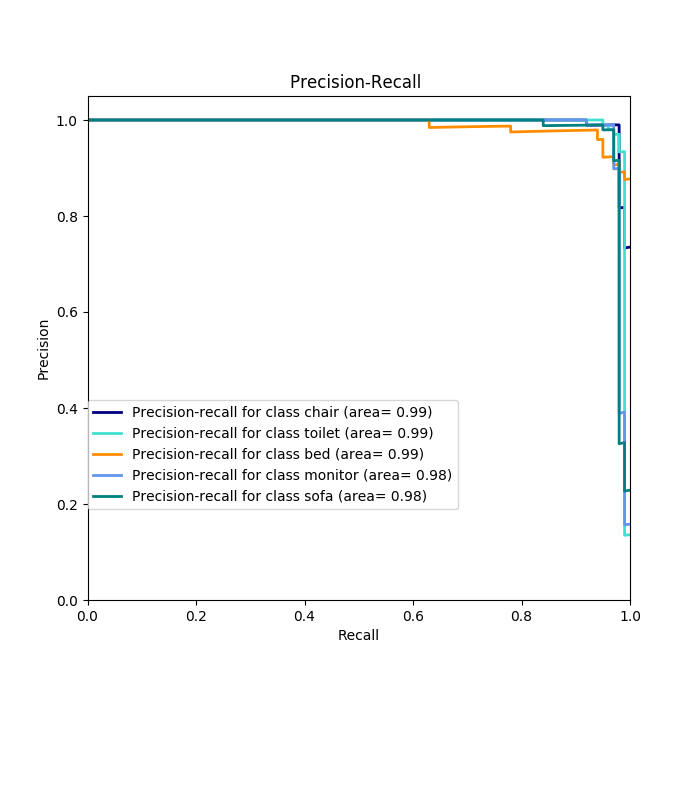

In [106]:
Image(pr_auc_paths[2], height=400, width=400)

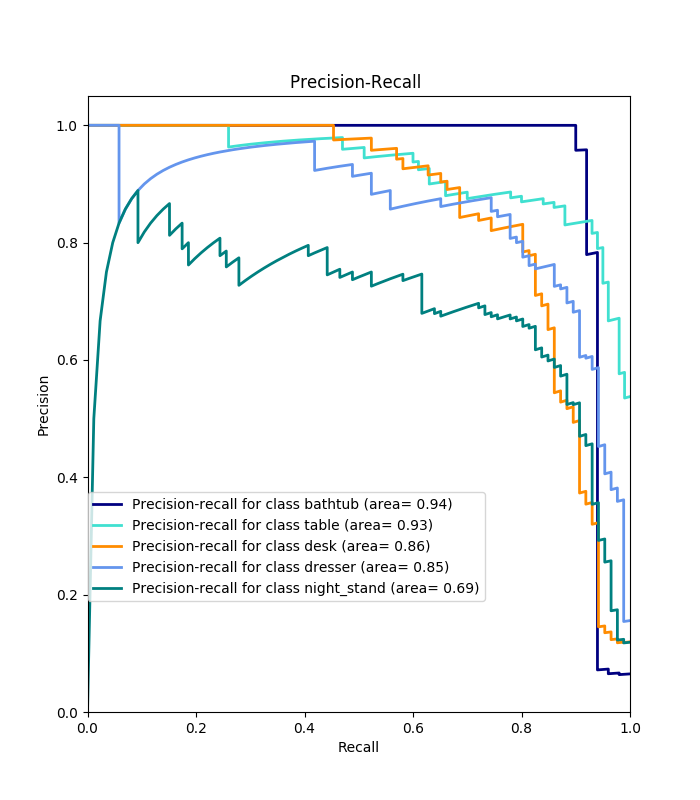

In [101]:
Image(pr_auc_paths[3], height=400, width=400)

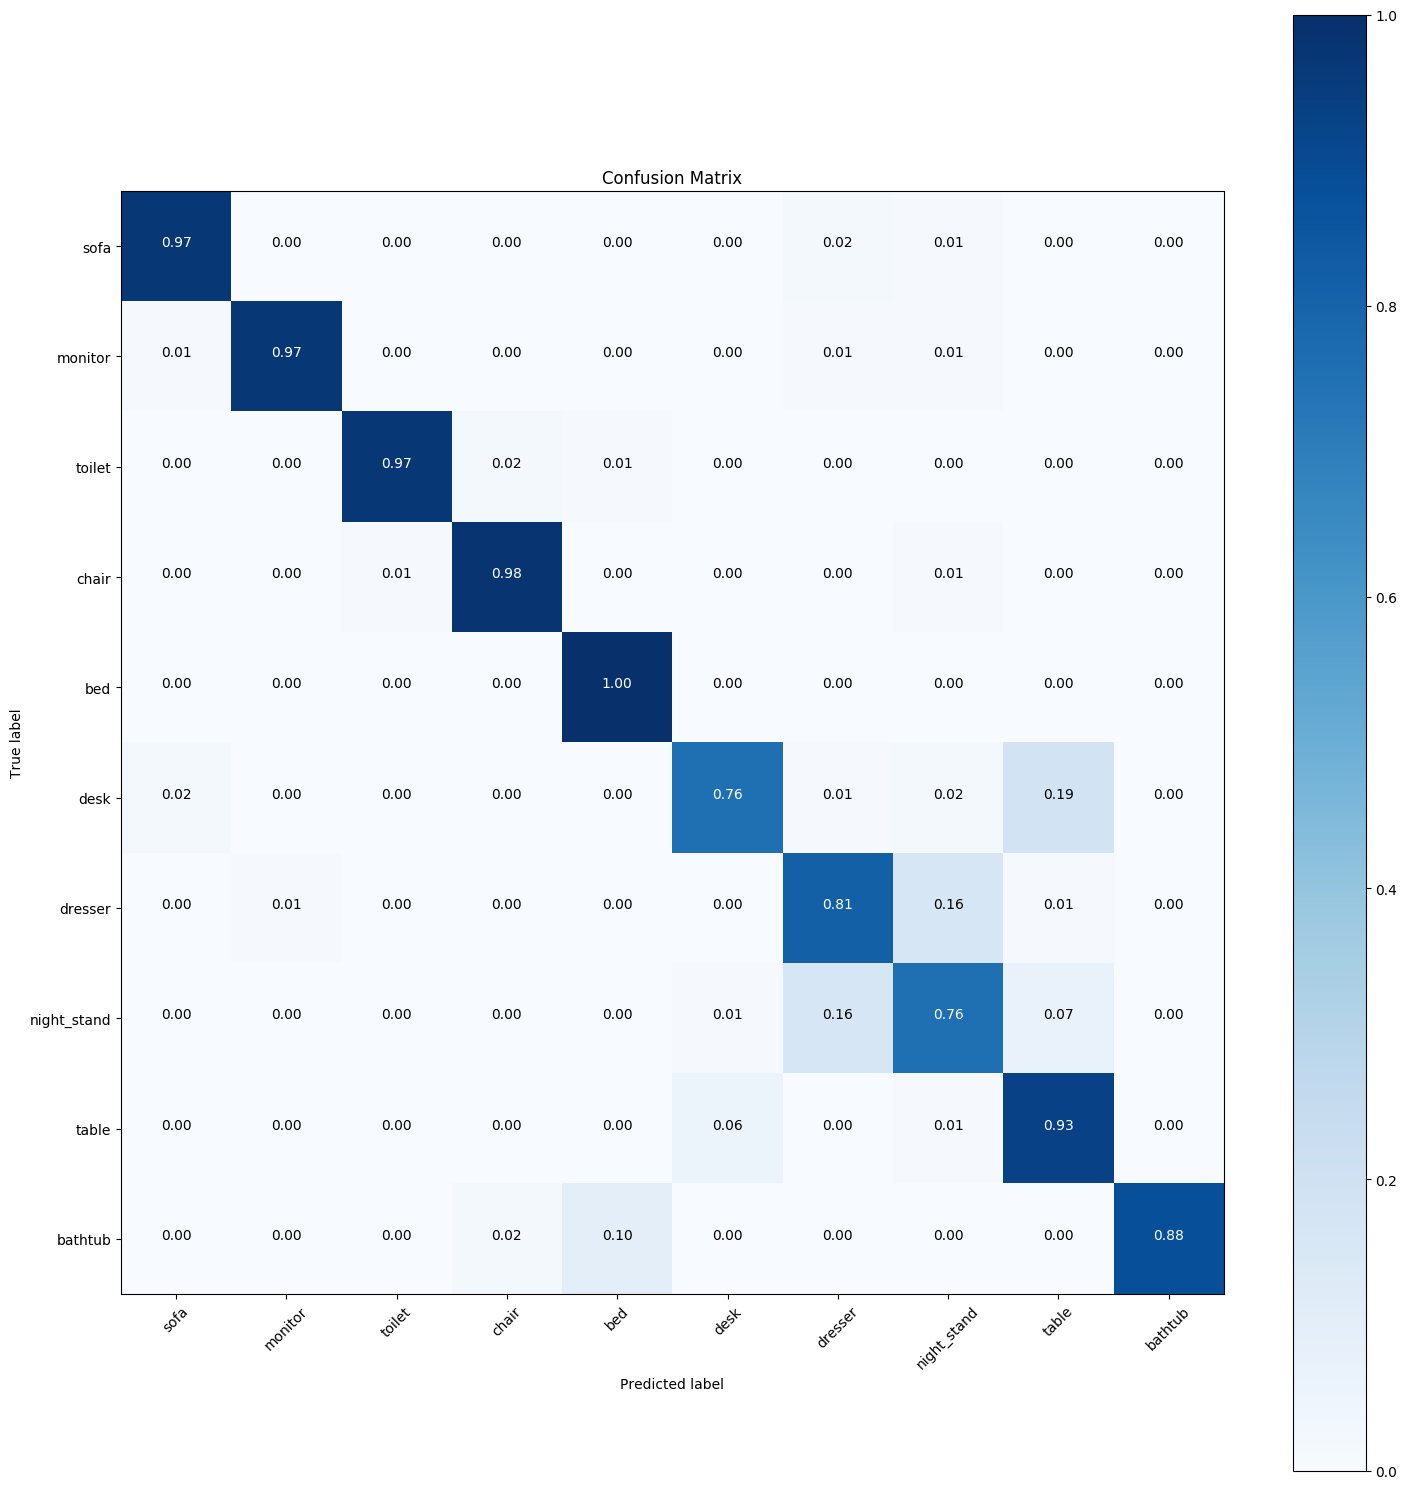

In [110]:
Image(filename=confusion_paths[1])

What do map activations look like for:
- good: Sofa
- bad: desk

In [119]:
import numpy as np
from keras.utils import to_categorical
from data import load_data, load_custom_model
from plots import plot_compare_recons, plot_recons, plot_vox, plot_dots

(_, _), (x_test, y_test), target_names = load_data('ModelNet10')
y_test = to_categorical(y_test)
y_pred = np.load(os.path.join(base_path, 'y_pred.npy'))
manipulate_model = load_custom_model(os.path.join(base_path, 'models', 'manipulate_model.hdf5'))

eval_model = load_custom_model(os.path.join(base_path, 'models', 'eval_model.hdf5'))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


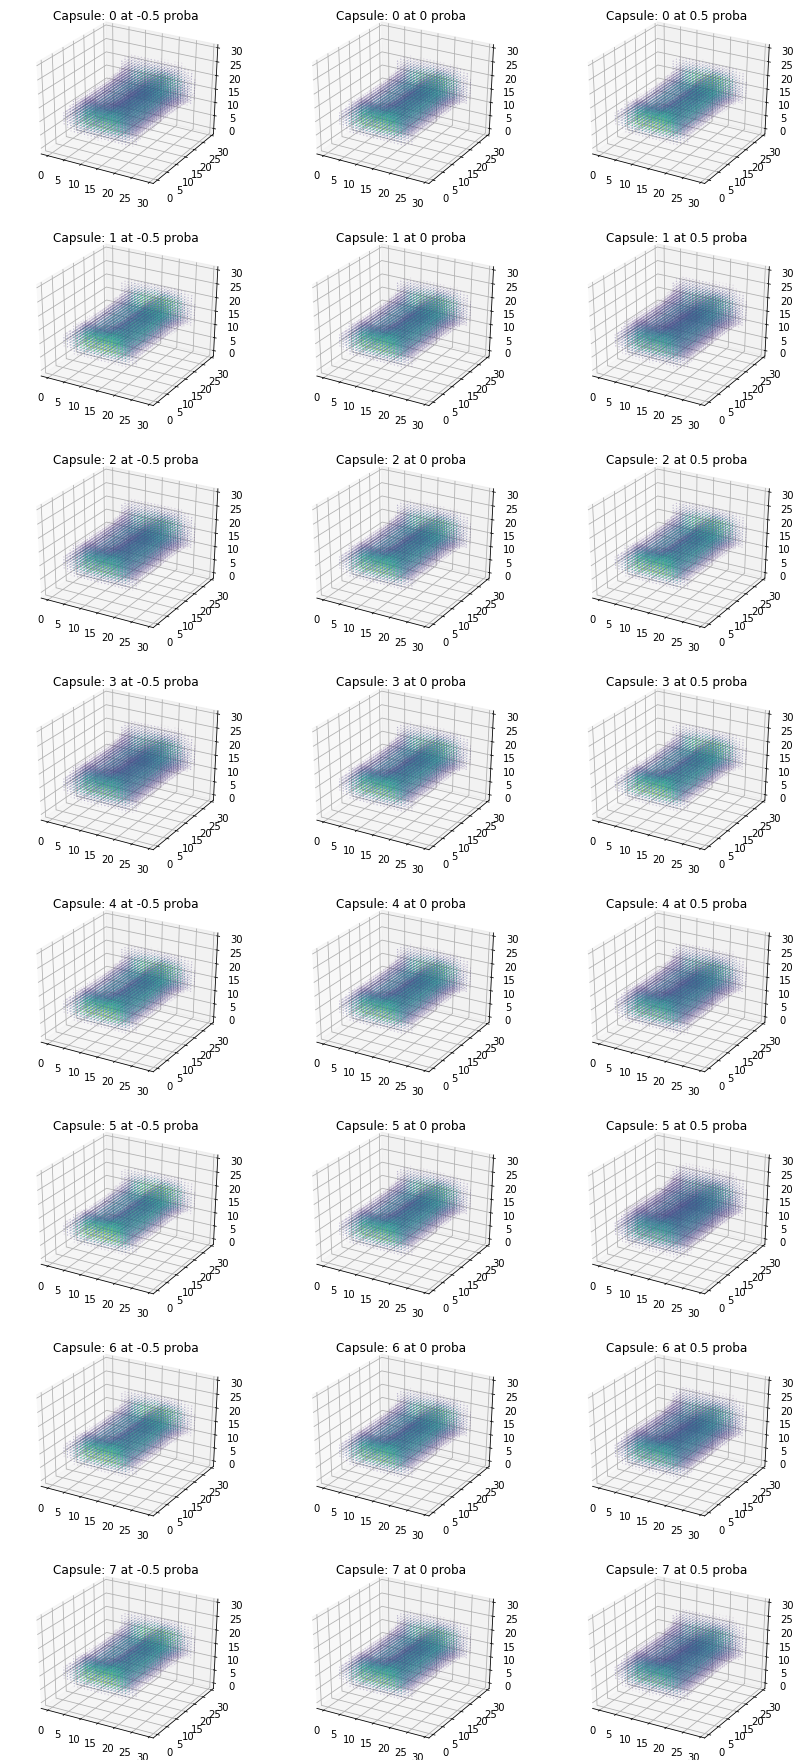

In [162]:
sub_index = 2
index = np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1)\
                            & (np.argmax(y_test, axis=1) == target_names.index('sofa'))
x_true_positive_sofa = x_test[index][sub_index]
y_true_positive_sofa = y_test[index][sub_index]

plot_recons(x_true_positive_sofa, y_true_positive_sofa, 8,
            manipulate_model, dotsize_scale=1, proba_range=[-0.5, 0, 0.5])

What do map activations look like for a chair?

In [184]:
kind = 'chair'
sub_index = 2
sub_index_2 = 0
tp_index = (np.argmax(y_test, axis=1) == target_names.index(kind)) &\
           (np.argmax(y_pred, axis=1) == target_names.index(kind))
x_tp_chair = x_test[tp_index][sub_index]
y_tp_chair = y_test[tp_index][sub_index]

fn_index = (np.argmax(y_test, axis=1) == target_names.index(kind)) &\
           (np.argmax(y_pred, axis=1) != target_names.index(kind))
x_fn_chair = x_test[fn_index][sub_index_2]
y_fn_chair = y_test[fn_index][sub_index_2]

True Positive

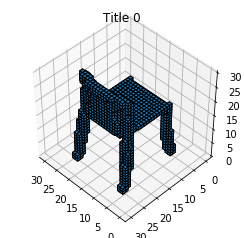

In [186]:
plot_vox(x_tp_chair.reshape(30, 30, 30))

False Negative

In [201]:
prediction = eval_model.predict(x_fn_chair.reshape(1, 30, 30, 30, 1))[0]
print("Model Prediction {}\nConfidence: {}"\
      .format(target_names[np.argmax(prediction)], prediction.max()))

Model Prediction night_stand
Confidence: 0.7415950298309326


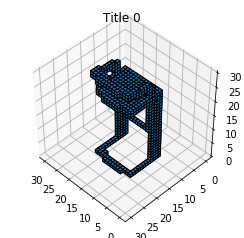

In [185]:
plot_vox(x_fn_chair.reshape(30, 30, 30))

What did it miss? 

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


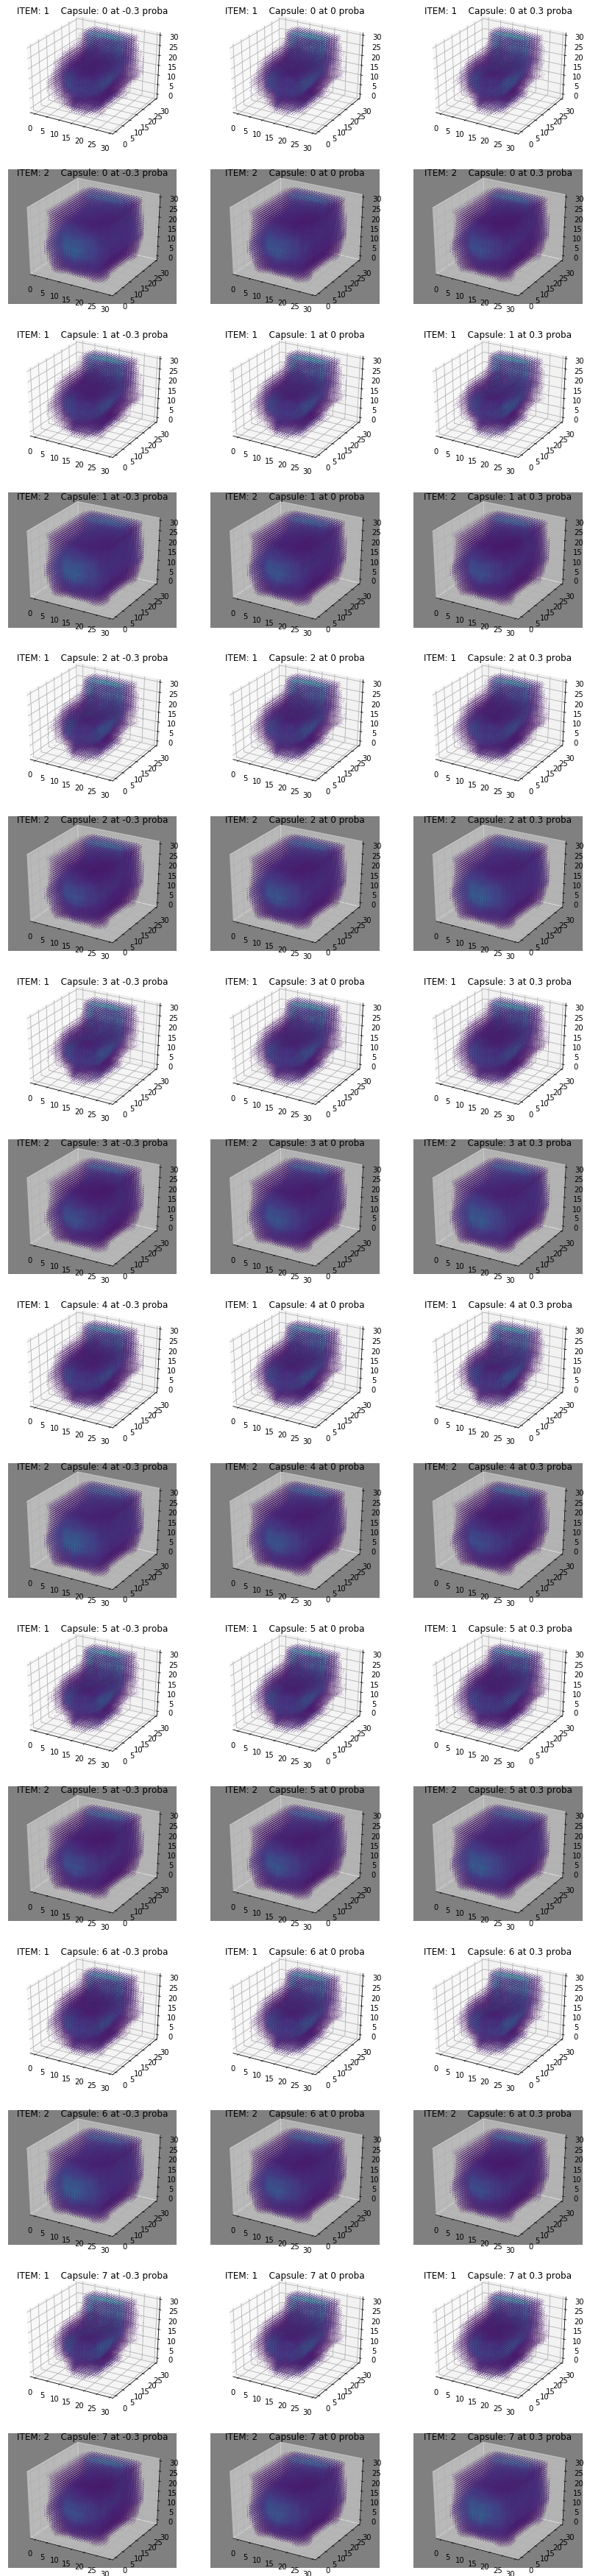

In [189]:
plot_compare_recons(x_tp_chair, x_fn_chair, y_tp_chair, y_fn_chair, 8,
                    manipulate_model, proba_range=[-0.3, 0, 0.3],
                    dotsize_scale=5, dotsize_offset=.3)


# plot_recons(x_true_positive_sofa, y_true_positive_sofa, 8,
#             manipulate_model, dotsize_scale=1, proba_range=[-0.5, 0, 0.5])

I possibly do see a nigtstand in there. ok. 

#### Look at top performer wth 4 channel
- Precision Recall AUC
- Confusion Matrix
- Compare unsuccessful classes to successful ones using map activation plots

In [9]:
df

accuracy  mean_avg_prec  rot_accuracy  rot_mean_avg_prec  \
19   0.90969        0.84778       0.34251            0.37395   
12   0.90198        0.83673       0.32930            0.35308   
18   0.89317        0.82704       0.32709            0.34672   
20   0.89207        0.82522       0.33260            0.35360   
2    0.88656        0.82756           NaN                NaN   
3    0.88436        0.82462           NaN                NaN   
7    0.87996        0.81304           NaN                NaN   
17   0.87885        0.81921           NaN                NaN   
5    0.87775        0.80771           NaN                NaN   
15   0.87775        0.80390           NaN                NaN   
9    0.87445        0.81544           NaN                NaN   
8    0.87225        0.80079       0.31938            0.32860   
14   0.87115        0.81003           NaN                NaN   
1    0.85683        0.79138           NaN                NaN   
0    0.85242        0.76423           NaN                NaN   
13   0.85022        0.75254           NaN                NaN   
21   0.85022        0.73431           NaN                NaN   
4    0.83921        0.75976           NaN                NaN   
16   0.83480        0.74217           NaN                NaN   
11   0.83040        0.72242           NaN                NaN   
6    0.72467        0.59002           NaN                NaN   
10   0.11013        0.19332           NaN                NaN   

   primary_cap_kernel_size n_channels lam_recon first_layer_kernel_size  \
19                       9          1      0.04                       9   
12                       9          2      0.04                       9   
18                       9          3      0.04                       9   
20                       9          2      0.04                       9   
2                        9          4      0.04                       9   
3                        9          4      0.04                       9   
7                        9          4      0.04                       9   
17                       9          4      0.04                       9   
5                        9          4      0.04                       9   
15                       7          4      0.04                       9   
9                        9          4      0.04                       9   
8                        9          3      0.04                       9   
14                       9          4      0.04                       9   
1                        9          4      0.04                       9   
0                        7          4      0.04                       9   
13                       7          4      0.04                       9   
21                       7          4      0.04                       9   
4                        9          4      0.04                       9   
16                       7          4      0.04                       9   
11                       7          4      0.04                       9   
6                        7          4      0.04                       9   
10                       7          4      0.04                       9   

   dim_sub_capsule dim_primary_capsule conv_layer_filters NUM_EPOCHS INIT_LR  \
19               8                   8                256         10   0.003   
12              16                   8                128         10   0.003   
18              16                   4                128         10   0.003   
20              16                   4                128         10   0.003   
2                8                   8                 48         10   0.003   
3                8                   4                 48         10   0.003   
7               16                   8                 48         10   0.003   
17               8                   8                 24         10   0.003   
5               16                   8                 24         10   0.003   
15   

In [ ]:
df